In [1]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Data for a three-dimensional line
zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)
X = np.column_stack((xline,yline,zline))

pca = PCA(n_components=2)
pca.fit(X)
X_new = pca.inverse_transform(pca.transform(X))

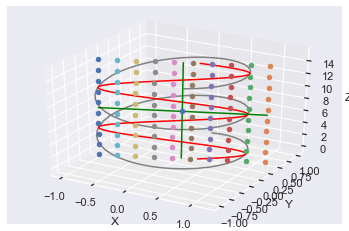

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.plot3D(xline,yline,zline, 'gray')
ax.plot3D(X_new[:,0],X_new[:,1],X_new[:,2], 'red')
ax.scatter3D([pca.mean_[0]],[pca.mean_[1]],[pca.mean_[2]], 'blue')

ax_scalars = {i:None for i in range(len(pca.components_))}
for i,vector in enumerate(pca.components_):
#     scalar projection for max distance
    projs = [(X-pca.mean_) for X in X_new]
    projs2 = [(np.dot(p,vector)/np.dot(vector,vector))*vector for p in projs]
    projs3 = [np.linalg.norm(projs2[i]-p) for i,p in enumerate(projs)]
    if not ax_scalars[i]:
        ax_scalars[i] = max(projs3)
    else:
        print("Vector twice?")

ax_data = []
steps = 10
for i,vector in enumerate(pca.components_):  
    # vector projection (from mean to orthogonally beneat point in PCA line)
    c_path3 = np.linspace(pca.mean_-(vector*ax_scalars[(i+1)%2]),pca.mean_+(vector*ax_scalars[(i+1)%2]),steps)
    ax.plot3D(c_path3[:,0],c_path3[:,1],c_path3[:,2], 'green')
    ax_data.append(c_path3)

data_2D = []
for i in ax_data[0]:
    for r in ax_data[1]:
        curv = i+(r-pca.mean_)
        data_2D.append(curv)
        ax.scatter3D([curv[0]],[curv[1]],[curv[2]], 'green')

plt.show()

In [5]:
def get_ranges(pca,inv_trans_X):
    ax_ranges = {i:None for i in range(len(pca.components_))}
    for i,vector in enumerate(pca.components_):
        # get max distance for scalar projection 
        projs = [(X-pca.mean_) for X in inv_trans_X]
        projs2 = [(np.dot(p,vector)/np.dot(vector,vector))*vector for p in projs]
        projs3 = [np.linalg.norm(projs2[i]-p) for i,p in enumerate(projs)]
        if not ax_ranges[i]:
            ax_ranges[i] = max(projs3)
        else:
            print("Vector twice?")
        
    ax_data = []
    steps = 10
    for i,vector in enumerate(pca.components_):  
        # vector projection (from mean to orthogonally beneat point in PCA line)
        ax_path = np.linspace(pca.mean_-(vector*ax_scalars[(i+1)%2]),pca.mean_+(vector*ax_scalars[(i+1)%2]),steps)
        ax_data.append(ax_path)
    return ax_data
    
# get 2D pca representation
def pca_data(data,d=2):
    pca = PCA(n_components=d)
    pca.fit(data)
    trans_X = pca.transform(data)
    inv_trans_X = pca.inverse_transform(trans_X)
    ax_ranges = get_ranges(pca,inv_trans_X)
    
    data_2D = []
    for i in ax_ranges[0]:
        for r in ax_ranges[1]:
            curv = i+(r-pca.mean_)
            data_2D.append(curv)
    return inv_trans_X,trans_X,pca.transform(data_2D)

def plot_pca2D(trans_X,inv_trans_X,data_2D):
    idx = [0,steps-1,steps*(steps-1)]
    colors = ['red','yellow','black']

    plt.plot(trans_X[:,0],trans_X[:,1])
    plt.scatter(data_2D[:,0],data_2D[:,1])
    
    for i,x in enumerate(colors):
        ix = idx[i]
        plt.scatter(data_2D[ix][0],data_2D[ix][1],color=colors[i])

C:\Users\enrik\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


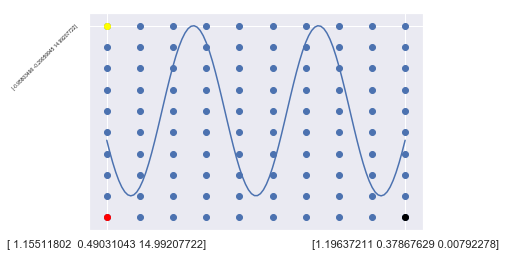

In [5]:
inv_trans_X,trans_X,data_2D = pca_data(X)
plot_pca2D(trans_X,inv_trans_X,data_2D)
ticks_params = []

grid_nD = pca.inverse_transform(data_2D)
idx = [0,steps-1,steps*(steps-1)]
xvals = [min(data_2D[:,0]),max(data_2D[:,0])]
xtick = [grid_nD[idx[0]],grid_nD[idx[-1]]]
yval = [max(data_2D[:,1])]
ytick = [grid_nD[idx[1]]]

plt.xticks(xvals,xtick)
plt.yticks(yval,ytick)
plt.yticks(rotation=45,fontsize=5)
plt.show()

[[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 ...
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]]


((40, 50), (40, 50), (40, 50))

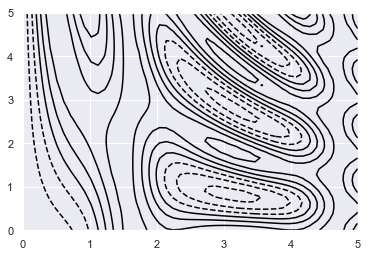

In [6]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)



x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
print(X)
plt.contour(X, Y, Z, colors='black');

# x = np.linspace(0, len(ax_data[0]), len(ax_data[0])+1)
# y = np.linspace(0, len(ax_data[1]), len(ax_data[1])+1)
# xx,yy = np.meshgrid(x,y)

# for x in xx:
#     for y in yy:
#         print(x,y)
# ax_data
X.shape, Y.shape, Z.shape

## Example 2:

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


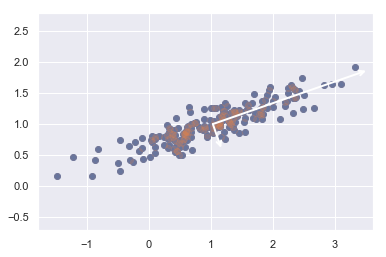

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T+1
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = -1*vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

original shape:    (200, 2)
transformed shape: (200, 1)


(array([[ 6.76769235e-01],
        [-1.07121393e+00],
        [ 7.27912364e-01],
        [ 2.30964136e+00],
        [ 6.30052323e-01],
        [ 1.02448887e+00],
        [ 7.77183507e-01],
        [-1.39656414e+00],
        [-2.91049874e-01],
        [ 1.88864221e+00],
        [-7.11544293e-01],
        [ 6.38884130e-01],
        [ 5.48059617e-01],
        [-2.19312436e-01],
        [-3.87789490e-01],
        [ 7.15219956e-01],
        [-1.08373816e+00],
        [-2.99917403e-01],
        [-7.96849021e-01],
        [-8.12568346e-01],
        [-1.54018281e+00],
        [-2.52920476e-01],
        [ 6.26464454e-01],
        [-1.61007571e+00],
        [ 5.04240563e-01],
        [ 5.53935753e-01],
        [ 6.81911252e-01],
        [-2.00157228e-02],
        [ 1.13550833e-01],
        [ 2.92286085e-02],
        [-2.14393483e-01],
        [-1.03406124e+00],
        [ 3.88635004e-01],
        [ 9.96727811e-01],
        [ 1.39223653e+00],
        [ 4.57043694e-01],
        [ 6.81839901e-01],
 

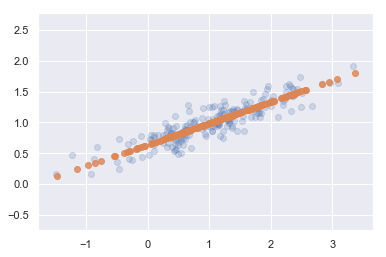

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

X_pca,X_new

In [30]:
paths = pd.read_pickle("../experiments/test_paths.pkl")
# path1 = paths.iloc[2][0][0]
paths

,all_paths
0,"[1.0, 0.0, 0.0, 1.0]"
0,"[0.7975240939792443, 0.43562387790292867, 0.23..."
0,"[0.7975240839792442, 0.43562388790292866, 0.23..."
0,"[0.7975240839792442, 0.43562387790292867, 0.23..."
0,"[1.0, 0.0, 0.0, 1.0]"
0,"[0.8918358423821539, 0.5299401660157788, 0.0, ..."
0,"[1.0, 0.0, 0.0, 1.0]"
0,"[0.4175216644561696, 0.0, 0.0, 1.0]"
0,"[1.0, 0.0, 0.0, 1.0]"
0,"[0.42180274548769925, 0.0, 0.0, 1.0]"


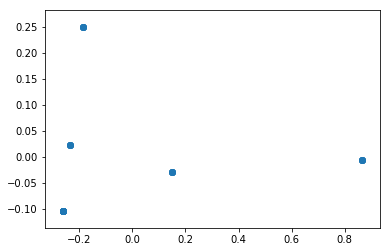

In [28]:
pca = PCA(n_components=2)
pca.fit(path1)
transf_path = pca.transform(path1)
inv_transf_path = pca.inverse_transform(transf_path)
plt.scatter(transf_path[:,0],transf_path[:,1])

In [27]:
inv_transf_path,pca.components_

(array([[ 0.00136796,  0.97651701,  1.000675  , -0.01308496],
        [ 0.34215115,  0.46508992,  0.98913274,  0.93978196],
        [ 0.34215114,  0.46508992,  0.98913274,  0.93978196],
        [ 0.34215114,  0.46508992,  0.98913274,  0.93978196],
        [ 0.34215114,  0.46508991,  0.98913274,  0.93978197],
        [ 0.00136796,  0.97651701,  1.000675  , -0.01308496],
        [ 0.16365172,  0.79639297,  0.99651627,  0.32692697],
        [ 0.16365171,  0.79639297,  0.99651627,  0.32692697],
        [ 0.16365171,  0.79639297,  0.99651627,  0.32692697],
        [ 0.16365171,  0.79639296,  0.99651627,  0.32692698],
        [ 0.00136796,  0.97651701,  1.000675  , -0.01308496],
        [ 0.36194794,  0.99253536,  1.00021457, -0.00415937],
        [ 0.36194793,  0.99253537,  1.00021457, -0.00415938],
        [ 0.36194793,  0.99253536,  1.00021457, -0.00415937],
        [ 0.36194793,  0.99253536,  1.00021457, -0.00415936],
        [ 0.00136796,  0.97651701,  1.000675  , -0.01308496],
        